In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Step 1. Data Read

In [2]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name = 'boston')
boston

/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [3]:
boston_df = boston.frame

In [4]:
boston_df = boston_df.rename({'MEDV':'HousePrice'}, axis = 1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

#### Step 2. Check for Missing Values.

In [6]:
boston_df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


**Observation**
  * There is no missing values in the dataset.

In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,HousePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


#### Step 4. Check for Normality in HousePrice

<Axes: xlabel='HousePrice', ylabel='Density'>

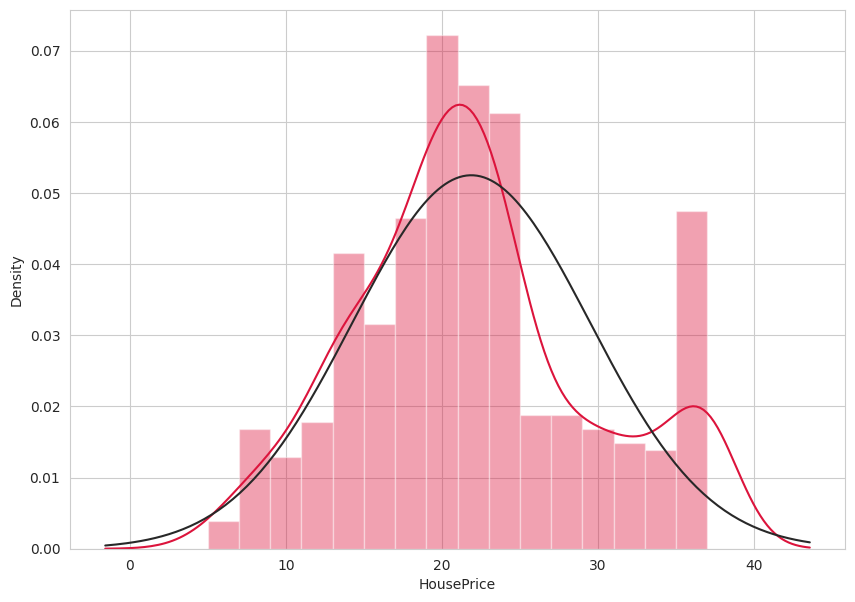

In [30]:
from scipy.stats import norm
sns.set_style('whitegrid')
plt.figure(figsize = (10,7))
sns.distplot(boston_df['HousePrice'], fit = norm, color = 'crimson')

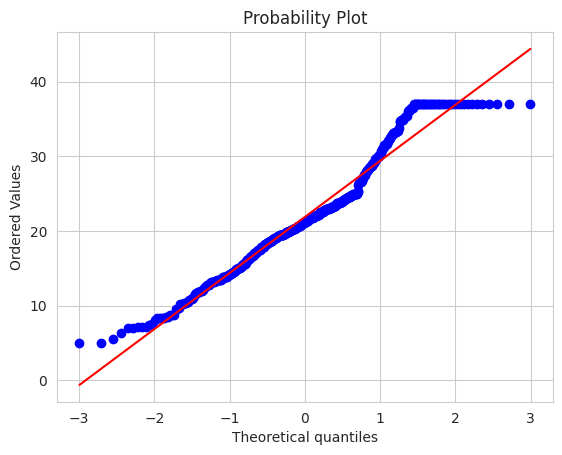

In [29]:
# Q-Q Plot
from scipy import stats
sns.set_style('whitegrid')
fig = plt.figure()
res = stats.probplot(boston_df['HousePrice'], plot = plt)

#### Step 4. Remove Outliers from HousePrice Column

<Axes: xlabel='HousePrice'>

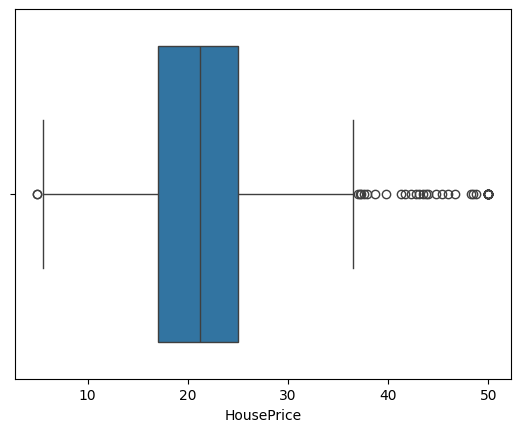

In [8]:
sns.boxplot(boston_df['HousePrice'], orient = 'h')

In [9]:
Q3 = boston_df['HousePrice'].quantile(.75)   # 75th Percentile
Q1 = boston_df['HousePrice'].quantile(.25)   # 25th Percentile
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [10]:
boston_df['HousePrice'] = np.where(boston_df['HousePrice'] > upper_limit, np.round(upper_limit), boston_df['HousePrice'])
boston_df['HousePrice'] = np.where(boston_df['HousePrice'] < lower_limit, np.round(lower_limit), boston_df['HousePrice'])

##### Step 5. Test For Linearity of the Model

In [11]:
import statsmodels.api as sm
boston.data = boston.data.apply(pd.to_numeric)
# ordinary least squares
boston_model = sm.OLS(boston.target, np.asarray(boston.data)).fit()
boston_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 24 Sep 2025   Prob (F-statistic):                        0.00
Time:                        10:40:29   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0929      0.034     -2.699      0.007      -0.161      -0.025
x2             0.0487      0.014      3.382      0.001       0.020       0.077
x3            -0.0041      0.064     -0.063      0.950      -0.131       0.123
x4             2.8540      0.904      3.157      0.002       1.078       4.630
x5            -2.8684      3.359     -0.854      0.394      -9.468       3.731
x6             5.9281      0.309     19.178      0.000       5.321       6.535
x7            -0.0073      0.014     -0.526      0.599      -0.034       0.020
x8            -0.9685      0.196     -4.951      0.000      -1.353      -0.584
x9             0.1712      0.067      2.564      0.011       0.040       0.302
x10           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
x11           -0.3922      0.110     -3.570      0.000      -0.608      -0.176
x12            0.0149      0.003      5.528      0.000       0.010       0.020
x13           -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted':predictions})
    df_results['Residuals'] = abs(df_results['Actual'] - df_results['Predicted'])
    return df_results

In [13]:
def linear_assumptions(model, features, label):
    df_results = calculate_residuals(model, features, label)
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg = False)
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

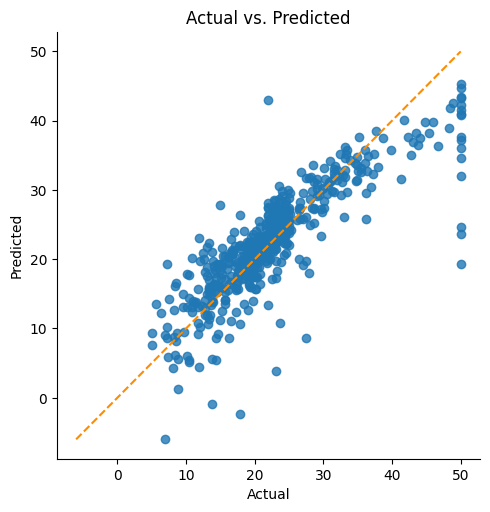

In [14]:
linear_assumptions(boston_model, boston.data, boston.target)

Step 6. Check for Multi-Collinearity
  * Check for correlations between features. Features with High Correlation we need to elliminate

<Axes: >

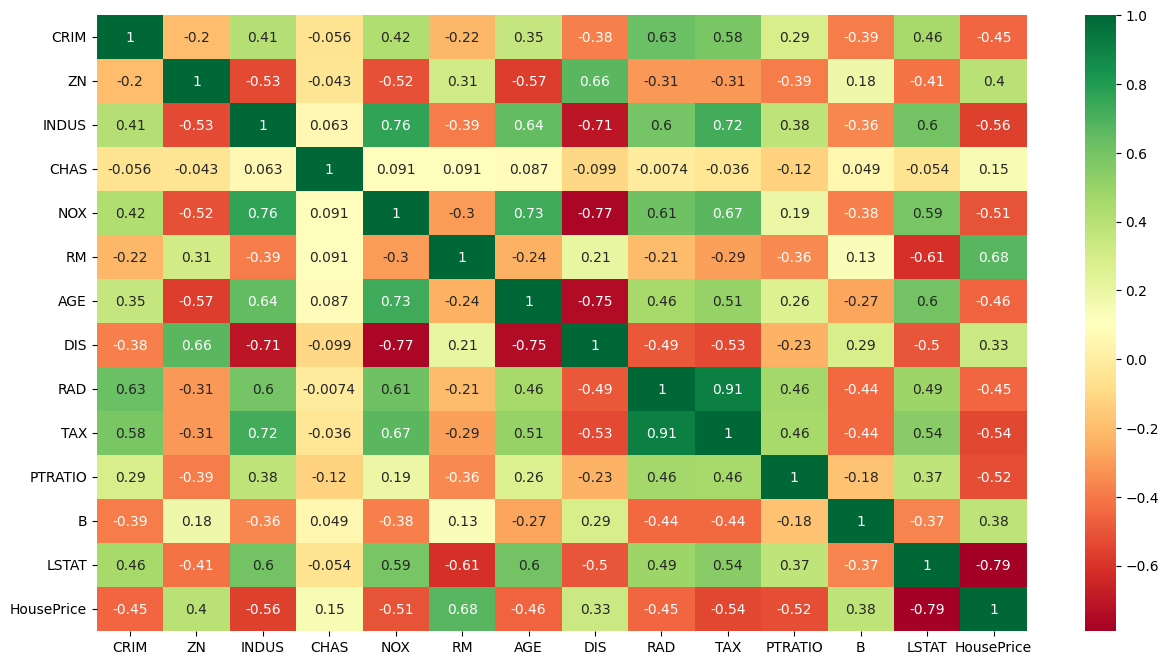

In [15]:
plt.figure(figsize = (15,8))
# feature corr closer to -1 or closer +1 will be condered as highly correlated features.
sns.heatmap(boston_df.corr(), cmap = 'RdYlGn', annot = True)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = boston_df.drop(['HousePrice'], axis = 1)
x = x.astype(float)
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

   Features        vif
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


__Observation__:
- From the above output, we can infer that the columns **NOX, RM** and **PTRATIO** have higher multicollinearity. Hence, we can drop them.

#### Step 7. Remove Multicollinear Feature & Split Data Set.

In [17]:
boston_df1 = boston_df.drop(['NOX','RM','PTRATIO'], axis = 1)

In [18]:
X = boston_df1.drop(['HousePrice'], axis = 1)
Y = boston_df1['HousePrice']

In [46]:
from sklearn.model_selection import train_test_split
# test_size = 0.2 (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 2, test_size = 0.2)

#### Step 8. Data Preprocessing
    * Scaling Down the features range into same range.

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
# fit => trained with dataset , transform => apply changes
x_train_scaler = scaler.fit_transform(X_train)
x_test_scaler = scaler.transform(X_test)

####Step 9. Linear Regression Model

In [48]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train_scaler, Y_train)

LinearRegression()

In [49]:
y_pred = lr_model.predict(x_test_scaler)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_score(Y_test, y_pred)

0.7546327158451115

In [51]:
# R2 Score (0,1) = Higher the better
print("R Square: {}".format(r2_score(Y_test, y_pred)))
print("MAE: {}".format(mean_absolute_error(Y_test, y_pred)))
print("MSE: {}".format(mean_squared_error(Y_test, y_pred)))

R Square: 0.7546327158451115
MAE: 3.126494047834116
MSE: 16.002023410469107


#### Make Predictions

In [54]:
X_test

,CRIM,ZN,INDUS,CHAS,AGE,DIS,RAD,TAX,B,LSTAT
463,5.82115,0.0,18.10,0,89.9,2.8016,24,666.0,393.82,10.29
152,1.12658,0.0,19.58,1,88.0,1.6102,5,403.0,343.28,12.12
291,0.07886,80.0,4.95,0,27.7,5.1167,4,245.0,396.90,3.56
183,0.10008,0.0,2.46,0,95.6,2.8470,3,193.0,396.90,5.68
384,20.08490,0.0,18.10,0,91.2,1.4395,24,666.0,285.83,30.63
...,...,...,...,...,...,...,...,...,...,...
200,0.01778,95.0,1.47,0,13.9,7.6534,3,402.0,384.30,4.45
12,0.09378,12.5,7.87,0,39.0,5.4509,5,311.0,390.50,15.71
129,0.88125,0.0,21.89,0,94.7,1.9799,4,437.0,396.90,18.34
194,0.01439,60.0,2.93,0,18.8,6.2196,1,265.0,376.70,4.38


In [55]:
X_new_sample = [[5.82115,	0.0,	18.10,	0,	89.9,	2.8016,	24,	666.0,	393.82,	10.29]]

In [56]:
X_new_scaler = scaler.transform(X_new_sample)

In [57]:
lr_model.predict(X_new_scaler)

array([22.22190724])